In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
%matplotlib inline

In [ ]:
# Read data, replace missing data by '?'
df = pd.read_csv("SkillCraft1_Dataset.csv", na_values=["?"])

Exercise 1 [are players' ages significantly different across different leagues?, 2 points]

Select all data, where LeagueIndex is in [1,3,6] (you can use df.query() syntax).

Include histograms of ages for each LeagueIndex (3 plots), make sure histograms include legend

Include boxplot of ages for each LeagueIndex

What is the mean and std of age for each LeagueIndex? (you can use groupby)

Perform oneway ANOVA test

In [6]:
indices = [1, 3, 6]
mydf = df.loc[df['LeagueIndex'].isin(indices)]

In [8]:
grouped_mydf = mydf.groupby("LeagueIndex")

LeagueIndex
1    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

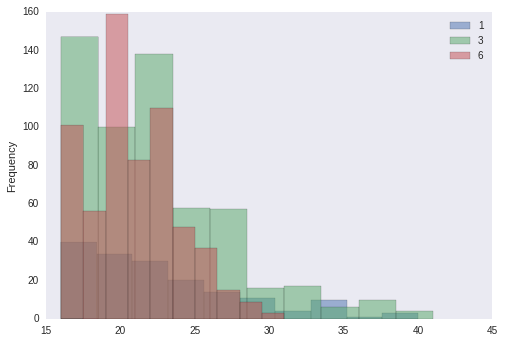

In [9]:
grouped_mydf["Age"].plot.hist(alpha=0.5,legend=True)

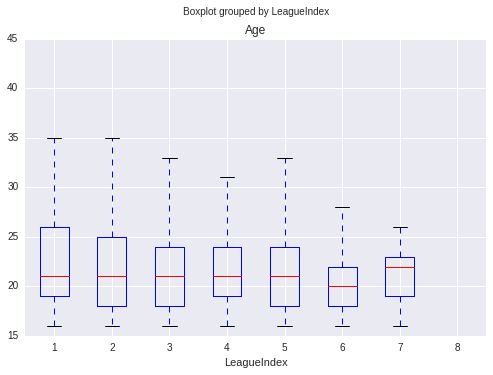

In [10]:
df.boxplot(column="Age", by="LeagueIndex")

In [11]:
grouped_df = df.groupby("LeagueIndex")

print "mean of age:\n",grouped_df["Age"].mean()
print "std of age:\n",grouped_df["Age"].std()

mean of age:
LeagueIndex
1    22.724551
2    22.155620
3    22.050633
4    21.981504
5    21.362283
6    20.677939
7    21.171429
8          NaN
Name: Age, dtype: float64
std of age:
LeagueIndex
1    5.522860
2    5.091531
3    4.901305
4    4.141736
5    3.662164
6    3.030381
7    2.864444
8         NaN
Name: Age, dtype: float64


ANOVA TEST

EX. 2

EX. 3

In [3]:
df = pd.read_csv("SkillCraft1_Dataset.csv", na_values=["?"])
indices = [1, 3, 6]
mydf = df.loc[df['LeagueIndex'].isin(indices)]
mydf = mydf.loc[mydf['HoursPerWeek'] != 0]

In [4]:
print mydf.columns
for c in ["Age", "TotalHours", "HoursPerWeek", "APM"]:
    logc = c + "_log10"
    mydf[logc] = np.log10(mydf[c])

Index([u'GameID', u'LeagueIndex', u'Age', u'HoursPerWeek', u'TotalHours',
       u'APM', u'SelectByHotkeys', u'AssignToHotkeys', u'UniqueHotkeys',
       u'MinimapAttacks', u'MinimapRightClicks', u'NumberOfPACs',
       u'GapBetweenPACs', u'ActionLatency', u'ActionsInPAC',
       u'TotalMapExplored', u'WorkersMade', u'UniqueUnitsMade',
       u'ComplexUnitsMade', u'ComplexAbilitiesUsed'],
      dtype='object')


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


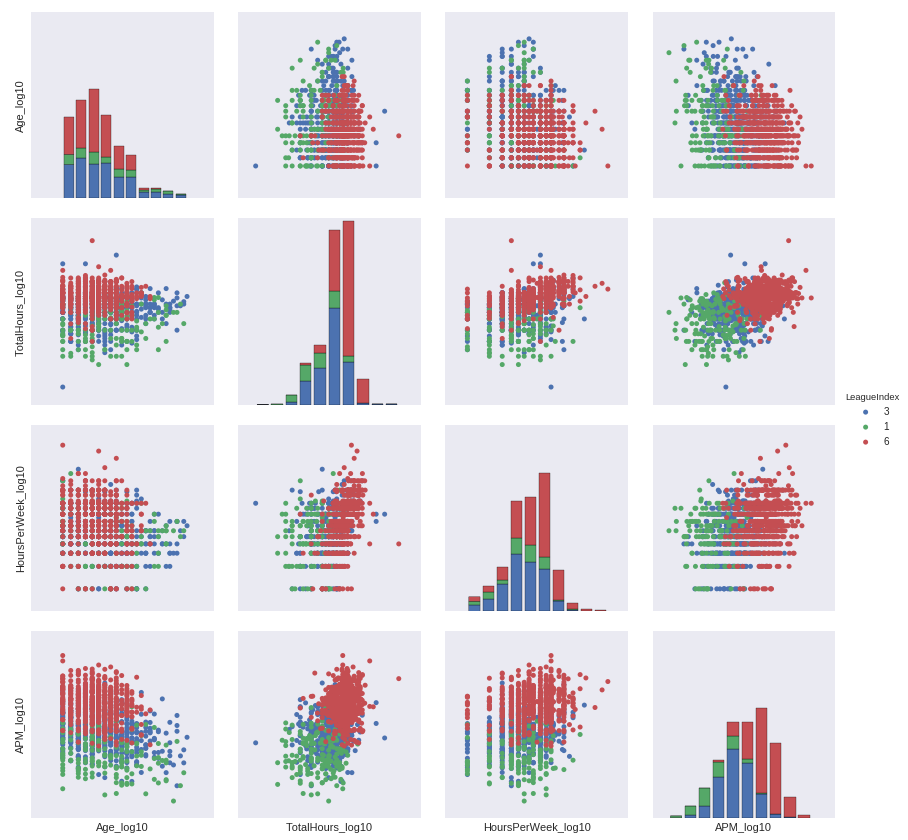

In [5]:
sns.set(style="dark")

newcols = ["Age", "TotalHours", "HoursPerWeek", "APM"]
newcols = [a + "_log10" for a in newcols]
g = sns.pairplot(mydf, 
             vars=newcols, 
             hue="LeagueIndex", 
             size=3, 
             markers='.', 
             plot_kws={"s":100, "edgecolor":'none'})
g.set(yticks=[], xticks=[])
